# 4 Eigenvalue Perspective of Ridge Regression

**STOP: If you have not completed Problem 2, please do that first!**

**Please note that this section will be more math heavy and serves more as a supplemental section for those who want to further deepen their understanding of ridge regression and its relation to OLS.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed

def get_features(d, x_scalars):
    X = []
    for x in x_scalars:
        X.append([x**i for i in range(d+1)])
    return np.array(X)

### 4.1 Diving a Little Deeper

Let's reiterate how OLS is solved again:

Optimization Problem: 

$$\underset{w}{\min} \|y - Xw \|_2^2$$

Closed Form Solution:

$$\hat{w} = (X^TX)^{-1}X^T\vec{y}$$

Let's dig a little deeper into the matrix $X^TX$ from the closed-form solution, but first let's build some intuition.

---

**4.1.1.** Suppose each data point in $X$ was 1 dimensional.

The matrix multiplication $X^T X$ would be $1 \times n$ by $n \times 1$, which outputs a $1 \times 1$ matrix, making $X^T X$ a scalar in this case.

**What values of $X^T X$ may "mess up" the calculation of $\hat{w}$ in the closed-form solution? *(Hint: What happens if $X^TX$ is 0 or close to 0)***

**SOLUTION:** If $X^TX$ is 0 or very close to 0, then $(X^TX)^{-1}$, or $\frac{1}{X^TX}$, would end up exploding, since $\frac{1}{x}$ would approach infinity as $x$ approaches 0.

---

Let's expand this issue a more general case, when $X^TX$ is a matrix. But before that let's do a quick review on eigenvalues and eigenvectors.

In EECS 16A, you learned about eigenvalues and eigenvectors of a matrix, where the $i$th eigenvalue-eigenvector pair $(\lambda_i, \vec{v}_i)$ of some matrix $A$ exhibits the following behavior:

$$A\vec{v}_i = \lambda_i \vec{v}_i$$

You also learned about diagonalization, where if a $n \times n$ matrix has $n$ linearly independent eigenvectors, then you can express some matrix $A$ as:

$$A = V \Lambda V^{-1}$$

Where $V = \begin{bmatrix} \vec{v}_1 & \cdots & \vec{v}_n \end{bmatrix}$ is the matrix where each column is an eigenvector of the matrix, and $\Lambda$ is a diagonal matrix containing the eigenvalues, i.e.:

$$\Lambda = \begin{bmatrix} 
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_n
\end{bmatrix}$$



Now that we have done a quick review of eigenvalues and eigenvectors, we are now ready to analyze $X^T X$.

Fortunately, $X^TX$ (and any matrix that of similar form) falls into a category of special matrices known as positive-semidefinite matrices, and has two properties that we will utilize:

* $X^TX$ is symmetric (verify with yourself why this is true), and thus is diagonalizable.
* Being positive semidefinite, $X^TX$ has eigenvalues that positive or zero, that is $\lambda_i \geq 0, \forall i$.

As mentioned above $X^T X$ is symmetric and thus diagonalizable, which is great news! We can diagonalize $X^T X$ in the following manner.

$$X^T X = V \Lambda V^{-1}$$

With this decomposition, we can now analyze the eigenvalues of $X^T X$ as they are located in $\Lambda$, and this will help us reveal more about the behavior of OLS.

Now we are ready to examine $(X^T X)^{-1}$.

Based on the scalar case, we know that taking the inverse, aka taking the reciprocal can lead to some issues, so let's see if something similar shows up. Using the diagonalization of $X^T X$, we can construct an inverse in terms of $V$ and $\Lambda$.

We know that $V$ is comprised of linearly independent eigenvectors, as this is a requirement for diagonalization, which implies that $V$ is invertible. Thus, we can left multiply $X^T X$ by $V^{-1}$ to get the following result:

$$V^{-1} (X^T X) = V^{-1} (V \Lambda V^{-1}) = \Lambda V^{-1}$$

Since $\Lambda$ is a diagonal matrix, its inverse is a diagonal matrix where each non-zero entry is the reciprocal of the corresponding entry in the original matrix. In the case of $\Lambda$, we have:

$$
\Lambda^{-1} = \begin{bmatrix} 
\frac{1}{\lambda_1} & 0 & \cdots & 0 \\
0 & \frac{1}{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \frac{1}{\lambda_n}
\end{bmatrix}
$$

We can then left multiply what we currently have by $\Lambda^{-1}$:

$$\Lambda^{-1} (V^{-1} X^T X) = \Lambda^{-1} (\Lambda V^{-1}) = V^{-1}$$

Finally, we can left multiply by $V$ again to obtain the identity matrix:

$$V(\Lambda^{-1} V^{-1} X^T X) = V(V^{-1}) = I$$

Thus we can conclude that

$$(X^T X)^{-1} = V^{-1} \Lambda^{-1} V$$

---

**4.1.2. Now that we know some more details about the inverse of $X^TX$, what problems may arise when calculating this matrix? *(Hint: Taking the reciprocal of a scalar $X^TX$ was a "weak point" in the process, is there something similar in the matrix case? What does being positive semi-definite mean for the eigenvalues of $X^TX$?)***

**SOLUTION:** Examining $\Lambda^{-1}$, we see that we are taking the reciprocals of the eigenvalues. However, since $X^TX$ is positive semi-definite, this means that it is possible for the eigenvalues of $X^T X$ to be 0 or near 0, which would cause these reciprocals to explode. If at least one of the eigenvalues were close to 0, it could cause $\hat{w}$ to explode as well. Furthermore, it would cause stability issues during the calculation.

---

Now that you have a better understanding of what is going on mathematically behind the scenes, let's examine the behavior of the data matrix in action!

## 4.2 Visualizing Eigenvalues

Let's visualize the eigenvalues of $X^T X$

For visualization purposes, we will resample $x$ values in the interval $[-1, 1]$. We then will featurize $x$ into $X$ with polynomial features at varying degrees.

**4.2.1. Implement the code to find the eigenvalues of a matrix. *(Hint: What numpy function can do this for us?)***

In [2]:
def eigenvalues(X):
    ### BEGIN CODE ###
    eigenvals = np.linalg.eig(X)[0]
    ### END CODE ###
    
    return eigenvals

**4.2.2 Run the following cell to see the eigenvalues of $X^T X$ at varying polynomial degrees. Pay attention to the scaling of the y-axis.**

In [3]:
np.random.seed(0)
x_range = np.random.uniform(-1, 1, 50)

def plot_OLS_eigenvalues(x, degree):
    X = get_features(degree, x)
    eigs = eigenvalues(X.T @ X)
    plt.plot(np.arange(1, len(eigs) + 1), eigs, 'o', label="Eigenvalues")
    plt.yscale('log')
    plt.xlim((0, 76))
    plt.ylim((1e-20, 1e4))
    plt.legend()

deg_slider = widgets.IntSlider(value=1,
                               min=1,
                               max=75,
                               step=1,
                               description="Degree")

interactive(plot_OLS_eigenvalues, x=fixed(x_range), degree=deg_slider)

interactive(children=(IntSlider(value=1, description='Degree', max=75, min=1), Output()), _dom_classes=('widge…

---

**4.2.3. Comment on what you observe. Does what you see match the cause for issues that may arise from taking the inverse of $X^T X$ in OLS?**

**SOLUTION:** We see that the eigenvalues sharply drop towards very small values and at a certain point, they flatten out at around $10^{-15}$. If we were to examine the inverse in terms of $V$ and $\Lambda$, we'll see that $\Lambda^{-1}$ will explode at these small eigenvalues, i.e. $\frac{1}{10^{-15}} = 10^{15}$, which is a huge value. 

Aside: The eigenvalue calculation also runs into numerical instability, where it ends up returning complex values, but that actually contradicts the definition of a positive semidefinite matrix, since for a real matrix $A$, the eigenvalues are positive or zero and real.

---

Now let's examine the solution to ridge regression:

Optimization Problem: 

$$\underset{w, \lambda}{\min} \|y - Xw \|_2^2 + \lambda \|w\|_2^2$$

Closed Form Solution: 

$$\hat{w} = (X^TX + \lambda I)^{-1}X^T\vec{y}$$

Let's visualize the eigenvalues of $X^T X + \lambda I$.

**4.2.4 Run the cell below, where the features of $X$ is fixed to be at dimension 60, and we vary $\lambda$.**

In [4]:
X = get_features(60, x_range)
eigs_ols = eigenvalues(X.T @ X)

def plot_ridge_eigenvalues(X, lambd):
    eigs_ridge = eigenvalues(X.T @ X + lambd * np.eye(X.shape[1]))

    plt.plot(np.arange(1, len(eigs_ols) + 1), eigs_ols, 'o', label="OLS")
    plt.plot(np.arange(1, len(eigs_ridge) + 1), eigs_ridge, 'o', label="Ridge")
    plt.yscale('log')
    plt.ylim((1e-20, 1e4))
    plt.legend()

lambd_slider = widgets.FloatLogSlider(value=1e-10,
                                      min=-20, 
                                      max=1, 
                                      step=1, 
                                      description="lambda")

interactive(plot_ridge_eigenvalues, X=fixed(X), lambd=lambd_slider)

interactive(children=(FloatLogSlider(value=1e-10, description='lambda', max=1.0, min=-20.0, step=1.0), Output(…

---

**4.2.5 Comment on what you observe as you change $\lambda$. How do you think the calculation will differ between Ridge Regression and OLS?**

**SOLUTION:** We see that increasing $\lambda$ increases the lower bound on the eigenvalue of $X^TX + \lambda I$. This will help stablize the calculation of the inverse in Ridge Regression.

---

We can now see ridge regression in another perspective: it serves as a way to make OLS a more robust process by controlling the eigenvalues of the $X^T X$ matrix with a lower bound, stabilizing the calculation of the weight vector.

### 4.3 Ridge Regression as a High-Pass Filter

In EECS 16B, you have learned about RLC circuits and the phasor space, which was used to help analyze circuits that receive sinusoidal voltages as an input.

(Based on Fall 2020, freq response occurs in week 5, but students already know about the phasor space, in this case it would be better to walk through a high pass filter and introduce the $H$ function).

We will walk through a specific type of RLC circuit called a high-pass filter and see how the behavior of this circuit relates to the eigenvalues in Ridge Regression.

(In the case where frequency responses and bode plots have already been introduced)

In particular, you learned about how you can create filters for certain frequencies, where a high-pass filter lets high frequences through, a low pass filter lets low frequencies through, and a band-pass only allows a range of frequencies to pass through.

Let's reanalyze the high-pass and low-pass filters and generate plots for their frequency responses.

Take a look at the following circuit below:

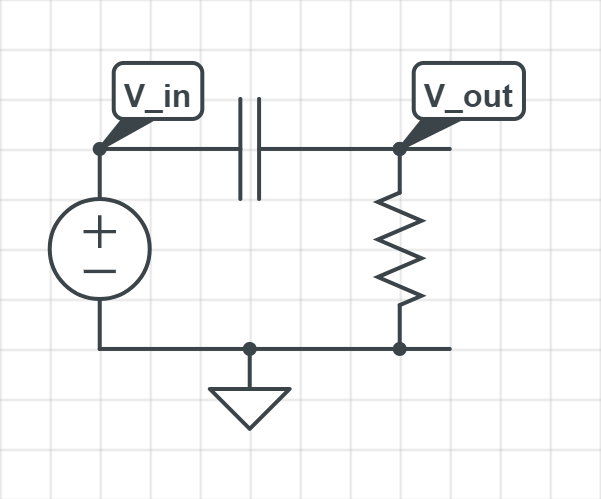

---

**4.3.1.** Suppose we had a sinusoidal input voltage at some frequency $\omega$, (i.e. $v_{in}(t) = \operatorname{Re} \left[V_{in} e^{j\omega t}\right]$), and a sinusoidal output voltage $v_{out}(t) = \operatorname{Re} \left[V_{out} e^{j\omega t}\right]$. The capacitor has a capacitance of $C$ and the resistor has a resistance of $R$.

**Convert the above circuit to the phasor domain. If $v_{in}$ and $v_{out}$ are the voltages in the domain of real numbers, what is their phasor representation *(Don't overthink this!)* What are the impedances of the capacitor and the resistor?**

**Solution:** The phasor counterparts of $v_{in}$ and $v_{out}$ are $V_{in}$ and $V_{out}$, repsectively. The impedance of the capacitor is $Z_C = \frac{1}{j\omega C}$ and the impedance of the resistor is $Z_R = R$.

---

**4.3.2.** Now that we have converted the components of the circuit into the phasor domain, we will now derive an important characteristic function called the *transfer function*:

$$H(\omega) = \frac{V_{out}}{V_{in}}$$

**Quickly explain what the transfer function represents. Derive the transfer function for this particular circuit, which will be of the form $\frac{1}{1 + h(\omega)}$, where $h(\omega)$ will be some function of $\omega$. *(Hint: Start with the impedances $Z_R$ and $Z_C$ and write out $H$ in terms of them. Then plug in the values for $Z_R$ and $Z_C$ you found in the previous problem).***

**SOLUTION:** The transfer function describes the ratio of the output to input voltage in the phasor space.

Since impedances describe a linear relationship between current and voltage in the phasor domain, we can simply treat them as resistors. We then see that this particular circuit is a voltage divider, where

$$V_{out} = \frac{Z_R}{Z_C + Z_R}V_{in}$$

From this we see that $H$ in terms of $Z_R$ and $Z_C$ is

$$H(\omega) = \frac{V_{out}}{V_{in}} = \frac{Z_R}{Z_C + Z_R}$$

Plugging in what we found for $Z_R$ and $Z_C$ in the previous problem:

$$\frac{Z_R}{Z_C + Z_R} = \frac{R}{\frac{1}{j \omega C} + R}$$

Finally, following the hint, we can simplify the transfer function by dividing the numerator and denominator by $R$:

$$\frac{R}{\frac{1}{j \omega C} + R} = \frac{1}{\frac{1}{j \omega RC} + 1}$$

Rearranging the terms in the denominator yields us the desired form:

$$H(\omega) = \frac{1}{1 + \frac{1}{j \omega RC}}$$

---

**4.3.3.** Now let's quickly analyze how the magnitude of the transfer function, and thus the magnitude of the input and output voltages, behave.

**What do you think is the largest magnitude $H(\omega)$ can take? At what value of $\omega$ do you think this will happen? Explain what that means in terms of the input and output voltages. 
What is the smallest magnitude $H(\omega)$ can take, and what value will $\omega$ be at? Explain what that means in terms of the input and output voltages.**

**SOLUTION:** We see that the second denominator term will be imaginary, so it will never cancel out any real component in $H(w)$. Thus, in order to maximize $H(\omega)$, we need the imaginary component to be 0. This will occur when $\omega$ approaches infinity. 

$$H(\infty) = \frac{1}{1 + j\frac{1}{\infty}} = \frac{1}{1 + 0j} = 1 \implies |H(\infty)| = 1$$

In this scenario, a ratio of 1 means that the magnitude of the output signal is the same as the input signal, or in other words the input signal is completely preserved in the output.

In order minimize $H(\omega)$ we want the imaginary component to be as large as possible. This will occur when $\omega = 0$. 

$$H(0) = \frac{1}{1 + j\frac{1}{0}} = \frac{1}{1 + \infty j}$$

$$|H(0)| = \left|\frac{1}{1 + \infty j}\right| = \frac{1}{|1 + \infty j|} = \frac{1}{\sqrt{1^2 + \infty^2}} \approx \frac{1}{\infty} = 0$$

In this scenario, a ratio of 0 means that the magnitude of the output signal is 0, or in other words, none of the input signal was preserved in the output.

---

**4.3.4 Explain why this particular circuit would be called a high-pass filter.**

**SOLUTION:** We see that at high frequencies, the input signal is preserved, while at low frequencies, little to no signal is preserved. Thus we can say this circuit filters out voltages such that it lets *high* frequencies *pass* through.

---

Now that we have an intuition of how the transfer function behaves, let's visualize it. A plot of the maginitude of the transfer function relative to the frequency of the input voltage is known as a *Bode Plot*.

**4.3.5. Run the next three cells below to take a look at the Bode Plot of our circuit. Play around with the slider that changes the value of $\frac{1}{RC}$. Again pay attention to the scale of both x and y axes.**

In [5]:
def high_pass(omega, RC):
    return 1 / (1 + 1 / (1j * omega * RC))


In [6]:
omega_range = np.logspace(-5, 5, 100)

def plot_high_pass(omegas, RC):
    magnitudes = np.absolute(high_pass(omegas, 1/RC))
    plt.plot(omegas, magnitudes)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim((1e-6, 1e1))
    plt.grid()

high_pass_slider = widgets.FloatLogSlider(value=1,
                                            min=-5,
                                            max=5,
                                            step=0.25,
                                            description="1/RC")

interactive(plot_high_pass, omegas=fixed(omega_range), RC=high_pass_slider)

interactive(children=(FloatLogSlider(value=1.0, description='1/RC', max=5.0, min=-5.0, step=0.25), Output()), …

In [7]:
def plot_high_pass_2(omegas, RC):
    magnitudes = np.absolute(high_pass(omegas, 1/RC))
    plt.plot(omegas, magnitudes)
    plt.xscale('log')
    plt.ylim((-.25, 1.25))
    plt.grid()

high_pass_slider = widgets.FloatLogSlider(value=1,
                                            min=-5,
                                            max=5,
                                            step=0.25,
                                            description="1/RC")

interactive(plot_high_pass_2, omegas=fixed(omega_range), RC=high_pass_slider)

interactive(children=(FloatLogSlider(value=1.0, description='1/RC', max=5.0, min=-5.0, step=0.25), Output()), …

---

**4.3.6. In the Bode plot, at what frequencies are the voltages kept and when is it "silenced"? What seems to be the threshold for this behavior?**

**SOLUTION:** We see that at frequencies greater than $\frac{1}{RC}$ the voltage response is left untouched, while at frequencies less than $\frac{1}{RC}$, the voltages are cut off.

---

**4.3.7. Compare this with the plot of eigenvalues. What part of the $H$ function do eigenvalues represent? What part of the $H$ function does $\lambda$ represent? *(Hint: What exactly does the $H$ function calculate? Can you use this information to relate it back to eigenvalues in Ridge?)***

**SOLUTION:** While a bit hard to see at first, if we think about the $H$ function as the ratio $\frac{V_{out}}{V_{in}}$, just like how the $H$ function tells us how much of $V_{in}$ to keep in $V_{out}$ based on $\omega$, Ridge Regression tells us how much of each eigenvalue to keep based on its value.

In our case, the eigenvalues would be represented by $\omega$, and $\lambda$ would be represented by $\frac{1}{RC}$. If the eigenvalue is larger than $\lambda$, then we see that its value is maintained. However, if it is less than $\lambda$, then we see that the eigenvalue gets "silenced".

---

Now you can see another perspective of Ridge Regression: as a high pass filter on eigenvalues! We hope you have a better intuition on how the eigenvalue plots work in relation to $\lambda$, and how it can help improve the regression performance compared to OLS.